In [4]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.font_manager as fm
font_path = "/content/drive/MyDrive/IT2022/Montserrat-Medium.ttf"
fm.fontManager.addfont(font_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load your dataset
path = '/content/drive/MyDrive/IT2022/creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Exclude target and non-feature columns
feature_cols = [col for col in df.columns if col not in ['Class', 'Time', 'Amount']]
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,149.62,0
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,2.69,0
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,378.66,0
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,123.50,0
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,69.99,0


In [ ]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

model = LGBMClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

[LightGBM] [Info] Number of positive: 492, number of negative: 284315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 284807, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001727 -> initscore=-6.359359
[LightGBM] [Info] Start training from score -6.359359


,Feature,Importance
18,V18,158
17,V17,155
12,V12,144
25,V25,128
0,Time,124
13,V13,122
10,V10,121
14,V14,117
15,V15,112
16,V16,110


<ipython-input-11-76d2a4866a60>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


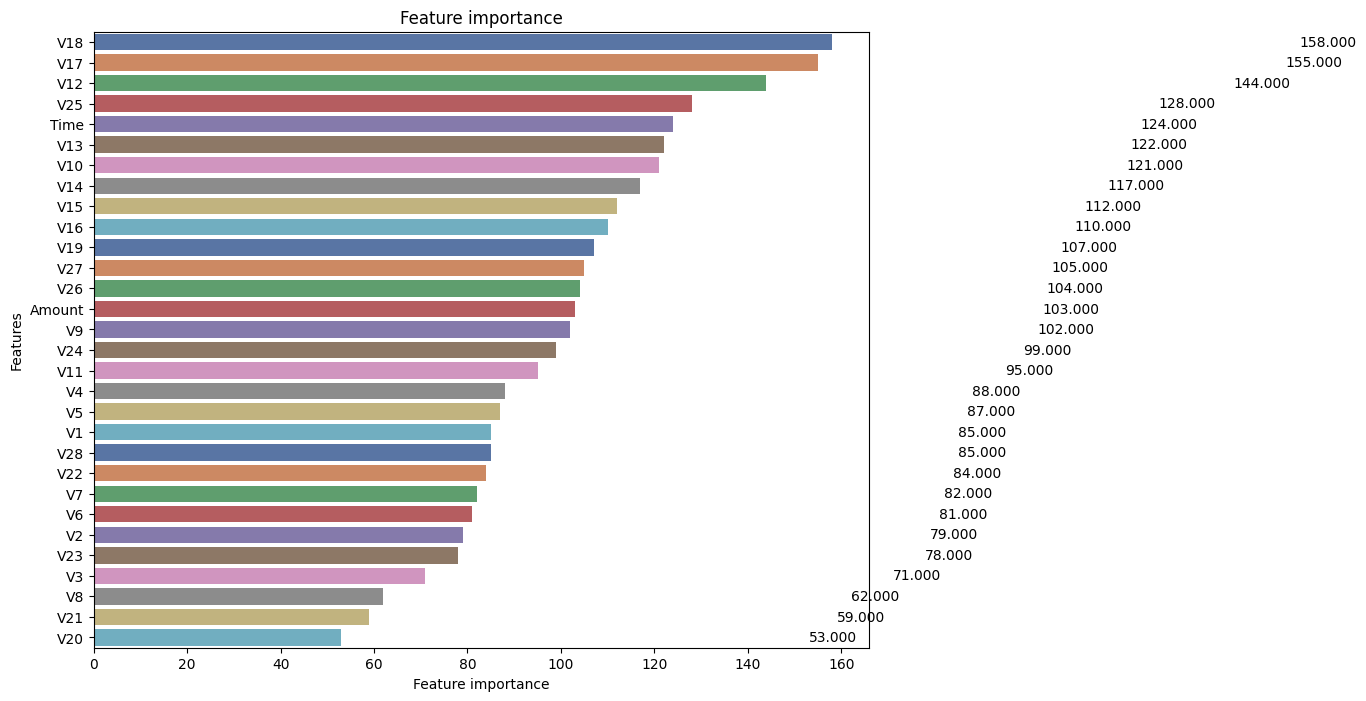

In [11]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=importance_df,
    y='Feature',
    x='Importance',
    palette='deep'
)
plt.title('Feature importance')
plt.xlabel('Feature importance')
plt.ylabel('Features')
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 100, i, f"{v:.3f}", va='center')
plt.show()

In [12]:
# Select top N features (e.g., top 5 as in the paper)
top_features = importance_df['Feature'].head(5).tolist()
print("Top features:", top_features)

# Prepare data for next stage
X_top = df_scaled[top_features]
X_top.head()

Top features: ['V18', 'V17', 'V12', 'V25', 'Time']


,V18,V17,V12,V25,Time
0,0.030770,0.244863,-0.618296,0.246585,0.0
1,-0.218763,-0.135170,1.066089,0.320694,0.0
2,-0.144790,1.306868,0.066137,-0.628537,1.0
3,2.345305,-0.805445,0.178371,1.241904,1.0
4,-0.045569,-0.279081,0.538627,-0.395202,2.0
